# Proyecto de Algebra lineal y ecuaciones diferenciales con Machine Learning - Apple





### Importando librerias

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression

### Cargando los datos

In [ ]:
file_name = '/content/drive/MyDrive/fh_5yrs.csv'
dataframe = pd.read_csv(file_name)

### Consultando la data

In [ ]:
# head para obtener las primeras 5 filas del dataframe
dataframe.head()

,date,volume,open,high,low,close,adjclose,symbol
0,2020-07-02,257500,17.639999,17.740000,17.620001,17.709999,17.709999,AAAU
1,2020-07-01,468100,17.730000,17.730000,17.540001,17.680000,17.680000,AAAU
2,2020-06-30,319100,17.650000,17.799999,17.610001,17.780001,17.780001,AAAU
3,2020-06-29,405500,17.670000,17.690001,17.629999,17.680000,17.680000,AAAU
4,2020-06-26,335100,17.490000,17.670000,17.420000,17.670000,17.670000,AAAU


In [ ]:
# Consulta el tamnio de la data y la informacion
print(len(dataframe))
print(dataframe.info)

6852038
<bound method DataFrame.info of                date  volume       open  ...      close   adjclose  symbol
0        2020-07-02  257500  17.639999  ...  17.709999  17.709999    AAAU
1        2020-07-01  468100  17.730000  ...  17.680000  17.680000    AAAU
2        2020-06-30  319100  17.650000  ...  17.780001  17.780001    AAAU
3        2020-06-29  405500  17.670000  ...  17.680000  17.680000    AAAU
4        2020-06-26  335100  17.490000  ...  17.670000  17.670000    AAAU
...             ...     ...        ...  ...        ...        ...     ...
6852033  2015-01-12   10000   0.140000  ...   0.140000   0.136302    ZYXI
6852034  2015-01-09     200   0.150000  ...   0.150000   0.146038    ZYXI
6852035  2015-01-07    8100   0.140000  ...   0.150000   0.146038    ZYXI
6852036  2015-01-05   33200   0.220000  ...   0.160000   0.155774    ZYXI
6852037  2015-01-02     100   0.180000  ...   0.180000   0.175245    ZYXI

[6852038 rows x 8 columns]>


### Filtrando los datos de la empresa **Apple**

<img src=https://appleosophy.com/wp-content/uploads/2020/01/appleicon.png  width="320"></img></a>

In [ ]:
# Filtro los datos de Apple en el dataframe original
filter_apple = dataframe['symbol'] == 'AAPL'
# Creo un nuevo dataframe llamado df_apple y almaceno todos los datos verdaderos del filtro que se aplico
df_apple = dataframe[filter_apple]
# Finalmento imprimo en consola las 5 primeras filas
df_apple.head()

,date,volume,open,high,low,close,adjclose,symbol
11610,2020-07-02,28484300,367.850006,370.470001,363.640015,364.109985,364.109985,AAPL
11611,2020-07-01,27684300,365.119995,367.359985,363.910004,364.109985,364.109985,AAPL
11612,2020-06-30,35055800,360.079987,365.980011,360.000000,364.799988,364.799988,AAPL
11613,2020-06-29,32661500,353.250000,362.170013,351.279999,361.779999,361.779999,AAPL
11614,2020-06-26,51314200,364.410004,365.320007,353.019989,353.630005,353.630005,AAPL


In [ ]:
# Consultando la informacion de df_apple
df_apple.info

<bound method DataFrame.info of              date    volume        open  ...       close    adjclose  symbol
11610  2020-07-02  28484300  367.850006  ...  364.109985  364.109985    AAPL
11611  2020-07-01  27684300  365.119995  ...  364.109985  364.109985    AAPL
11612  2020-06-30  35055800  360.079987  ...  364.799988  364.799988    AAPL
11613  2020-06-29  32661500  353.250000  ...  361.779999  361.779999    AAPL
11614  2020-06-26  51314200  364.410004  ...  353.630005  353.630005    AAPL
...           ...       ...         ...  ...         ...         ...     ...
12990  2015-01-08  59364500  109.230003  ...  111.889999  102.286186    AAPL
12991  2015-01-07  40105900  107.199997  ...  107.750000   98.501518    AAPL
12992  2015-01-06  65797100  106.540001  ...  106.260002   97.139420    AAPL
12993  2015-01-05  64285500  108.290001  ...  106.250000   97.130241    AAPL
12994  2015-01-02  53204600  111.389999  ...  109.330002   99.945885    AAPL

[1385 rows x 8 columns]>

In [ ]:
# Consulta el tipo de dato de cada columna del dataframe
df_apple.dtypes

date         object
volume        int64
open        float64
high        float64
low         float64
close       float64
adjclose    float64
symbol       object
dtype: object

### Cambiando formato fecha la columna "date"

In [ ]:
# Cambiando formato fecha la columna "date"
df_apple['date'] = pd.to_datetime(df_apple['date'], errors='coerce')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# Se consulta de nuevo el tipo de dato de cada columna para ver si se cambio el tipo de dato de la columna 'date'
df_apple.dtypes

date        datetime64[ns]
volume               int64
open               float64
high               float64
low                float64
close              float64
adjclose           float64
symbol              object
dtype: object

### Eliminando valores NaN

In [ ]:
# Se suma en cada columna la cantidad de valores perdidos
df_apple.isnull().sum()

date        0
volume      0
open        0
high        0
low         0
close       0
adjclose    0
symbol      0
dtype: int64

### Dividiendo la data en:


1.   80% entrenamiento
3.   20% prueba






In [ ]:
# en la variable tam guardo el tamanio de la data
tam = len(df_apple)
# en tam_test guardo el 20% del tamnio de tam
tam_test = int(0.2 * tam)
# en tam_train guardo lo que resta de tam_val y tam_test, es decir, el 80% del tamnio de la tada  
tam_train = int(tam - tam_test)

In [ ]:
# Establecemos un numero random estatico con una semilla de 2
np.random.seed(2)
# Creamos una variable indice para almacenar un vector de tamnanio del dataframe y con valores del 0 al tam-1
indice = np.arange(tam)
# Mezclamos los indices del vector que acabamos de crear
np.random.shuffle(indice)
# Declaramos df_shuffled para almacenar el dataframe con las lineas de la misma, pero esta vez mezclados para
# evitar algun tipo de comportamiento en particular
df_shuffled = df_apple.iloc[indice]

In [ ]:
# Aqui dividimos la data en tres dataframe

# 1. Obtenemos desde la linea 0 hasta el indice tam_train - 1 y lo almacenamos en df_train
# para el entrenamiento del modelo
df_train = df_shuffled.iloc[:tam_train].copy() 

# 3. Sumamos los indices de tam_train + tam_val - 1 para obtener el indice desde donde va a iniciar los datos
# de df_test y termina hasta la ultima linea del dataframe
df_test = df_shuffled.iloc[tam_train:].copy()

In [ ]:
# imprimimos cada df para ver si la data se distribuyo a como queremos
print('dimensiones del df_apple: ' + str(df_apple.shape))
print('dimensiones del df_train: ' + str(df_train.shape))
print('dimensiones del df_test: ' + str(df_test.shape))

dimensiones del df_apple: (1385, 8)
dimensiones del df_train: (1108, 8)
dimensiones del df_test: (277, 8)


### Visualizacion de datos

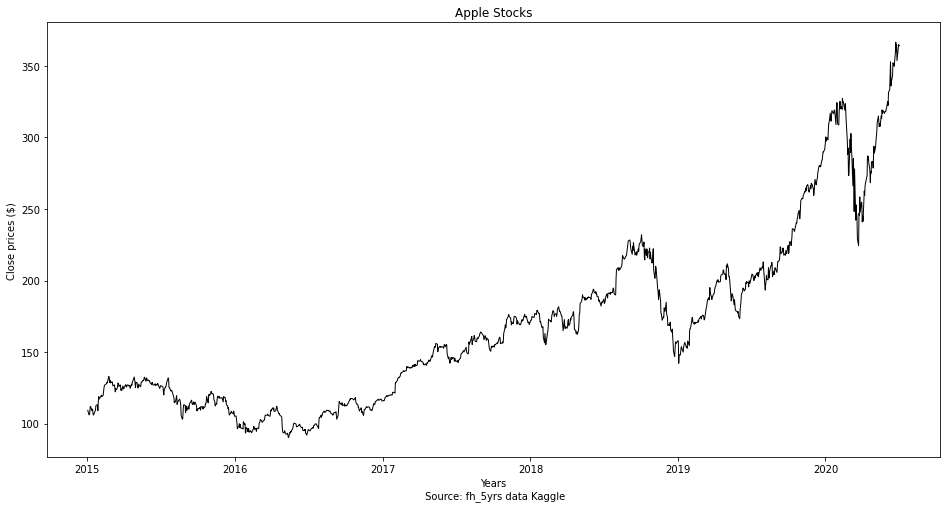

In [ ]:
# Creo el modelo de grafico de lineas con matplotlib y asigno en x los anios y en y ajdclose
plt.figure(figsize=(16,8))
plt.plot(df_apple['date'], df_apple['close'], color='black',linewidth=1)
# Agrego el titulo
plt.title('Apple Stocks')
# Agrego etiquetas a las coordenadas
plt.xlabel('Years\n Source: fh_5yrs data Kaggle')
plt.ylabel('Close prices ($)')
# Finalmente imprimo el grafico
plt.show()

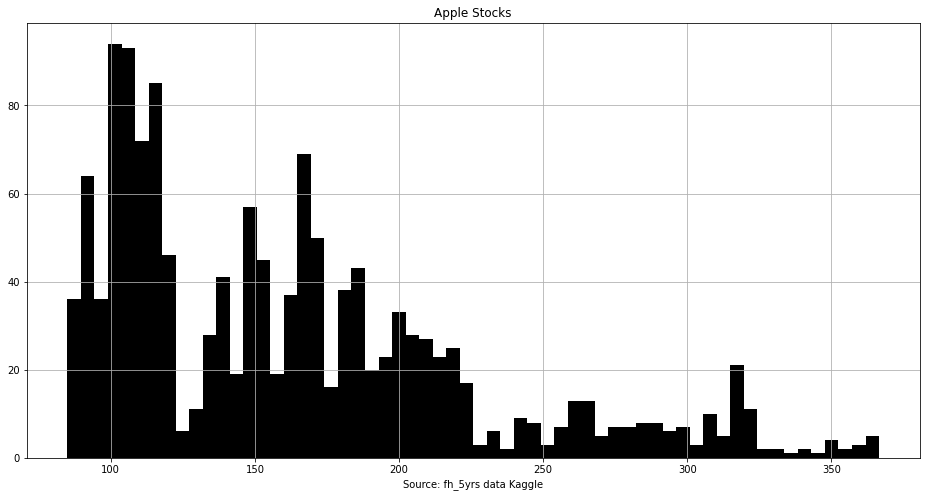

In [ ]:
# Creo un modelo de grafico de Histograma y le asigno los valores de la columna adjclose del dataframe
plt.figure(figsize=(16,8))
plt.hist(df_apple['adjclose'], bins=60, color='black')
# Agrego el titulo
plt.title('Apple Stocks')
# Agrego un tema al grafico
plt.xlabel('Source: fh_5yrs data Kaggle')
plt.grid() 
# Finalmente se muestra el grafico
plt.show()

In [ ]:
# Explorando las variables que tienen correlaciones lineales
corr = df_test.corr(method='pearson')
print(corr)

            volume      open      high       low     close  adjclose
volume    1.000000 -0.090376 -0.076244 -0.100027 -0.089502 -0.095184
open     -0.090376  1.000000  0.999473  0.999663  0.999203  0.998883
high     -0.076244  0.999473  1.000000  0.999393  0.999560  0.999292
low      -0.100027  0.999663  0.999393  1.000000  0.999642  0.999300
close    -0.089502  0.999203  0.999560  0.999642  1.000000  0.999647
adjclose -0.095184  0.998883  0.999292  0.999300  0.999647  1.000000


Text(0.5, 1.0, 'Correlation Pearson')

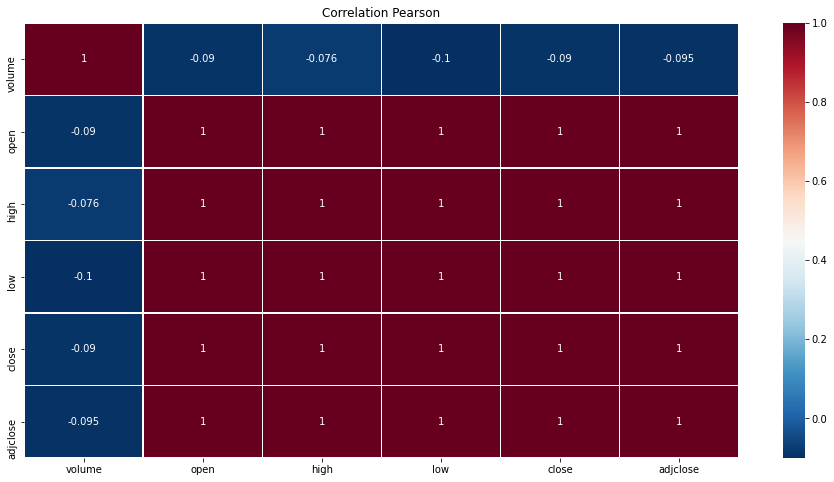

In [ ]:
# Creando una matriz con los resultados del metodo de 'pearson' aplicado en la linea anterior
plt.figure(figsize=(16,8))
sns.heatmap(corr,xticklabels=corr.columns, yticklabels=corr.columns,
 cmap='RdBu_r', annot=True, linewidth=0.5)
plt.title('Correlation Pearson')

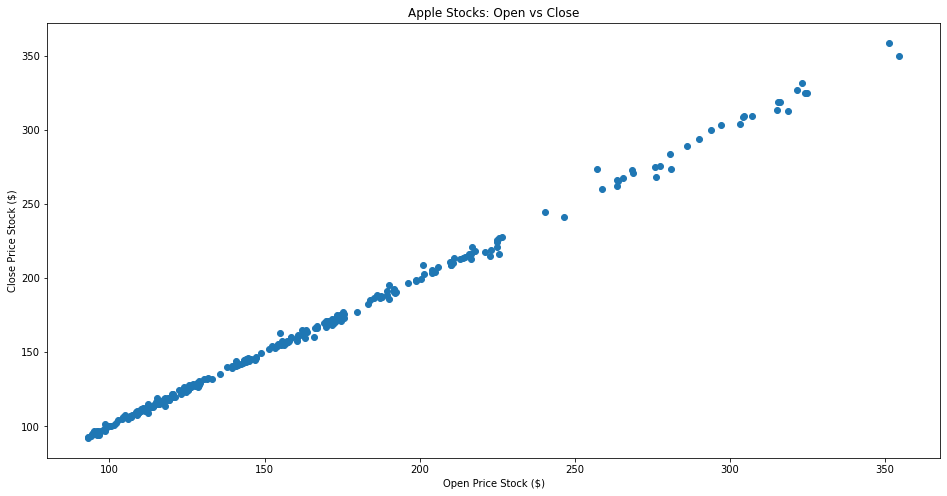

In [ ]:
# Creando un grafico que ayude con la interpretacion entre la relacion de las variables de close y open
plt.figure(figsize=(16,8))
# Creando un grafico de dispersion
plt.scatter(df_test['open'], df_test['close'])
# Agrego el titulo
plt.title('Apple Stocks: Open vs Close')
# Agrego etiquetas a las coordenadas
plt.xlabel('Open Price Stock ($)')
plt.ylabel('Close Price Stock ($)')
# Finalmente imprimo el grafico
plt.show()

In [ ]:
# Metodo aprendido de en DataCamp
# data_y = df_train[['close']].values
# data_x = df_train.drop('close', axis=1).values

In [ ]:
# Separacion la variable close para poder entrenar el modelo a partir de las otras variables
# que poseen fuerte relacion lineal
data_x = df_train[['open','high','low', 'adjclose']].values # values para almacenar los valores en una matriz
data_y = df_train[['close']].values # values para almacenar los valores en un vector columna

In [ ]:
# Mismo paso anterior, pero con la data de prueba
x_test = df_test[['open','high','low', 'adjclose']].values # values para almacenar los valores en una matriz
y_test = df_test[['close']].values # values para almacenar los valores en un vector columna

In [ ]:
# Formamos una matriz que en cada columna tienen valores que representan 'open','high','low', 'adjclose'
print(data_x[:5])
type(data_x)

[[116.86000061 117.37999725 116.33000183 110.68894196]
 [221.05999756 222.8500061  219.44000244 220.97914124]
 [118.55000305 119.83999634 118.43000031 109.87602234]
 [121.15000153 121.38999939 120.62000275 115.33456421]
 [165.38000488 167.52999878 164.38999939 162.78372192]]


numpy.ndarray

In [ ]:
print(data_y[:5])
type(data_y)

[[117.05999756]
 [222.77000427]
 [119.72000122]
 [121.34999847]
 [166.07000732]]


numpy.ndarray

# Prediccion con Scikit-Learn

---



# Entrenamiento del modelo

In [ ]:
# Declaracion del objeto de regresion lineal
linear_regression = LinearRegression()
# Entrenamiento del modelo
linear_regression.fit(data_x, data_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

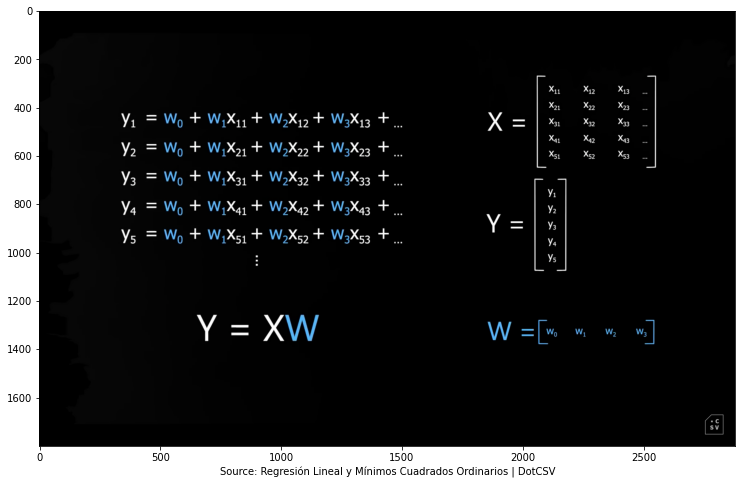

In [ ]:
# Importando una imagen para facilitar la explicacion del modelo de entrenamiento
plt.figure(figsize=(16,8))
# llamando a la imagen 
imag = plt.imread('/content/drive/MyDrive/fit.png')
plt.imshow(imag)
# Agregando fuente
plt.xlabel('Source: Regresión Lineal y Mínimos Cuadrados Ordinarios | DotCSV')
# Mostrar la imagen
plt.show()

# f(x) = g(X * W)


###### Desarrollo de la formula:
```
y = w_0 +(x_1 * w_1) + (x_2 * w_2) + (x_3 * w_3) + (x_4 * w_4)
```



In [ ]:
# Ejemplo:
prediccion_manual = -0.36250466 + (167.52999878 * 0.46974781) + (164.38999939 * 0.51109894) + (162.78372192 * 0.36957418)
print("El resultado falla por poco: " + str(prediccion_manual))

El resultado falla por poco: 222.51456035696933


### Ejemplo de vista en un plano de 3 dimensiones (3 variables)

# Nuestro ejemplo usa un hiperplano de 4 dimensiones (Regresion lineal multiple)


<img src=https://dlegorreta.files.wordpress.com/2015/09/regression_lineal.png  width="500"></img></a>

In [ ]:
# Coeficientes que utiliza el modelo para realizar el entrenamiento
# Segun Sklearn estos son los coeficientes estimados para el problema de regresión lineal
linear_regression.coef_

array([[-0.36250466,  0.46974781,  0.51109894,  0.36957418]])

# Prediccion de la variable dependiente: Precio de accion de cierre

In [ ]:
# Almaceno en la variable y_pred los valores que predicira el modelo de regresion lineal 
# Predice a partir de la bbdd de prueba
y_pred = linear_regression.predict(x_test)

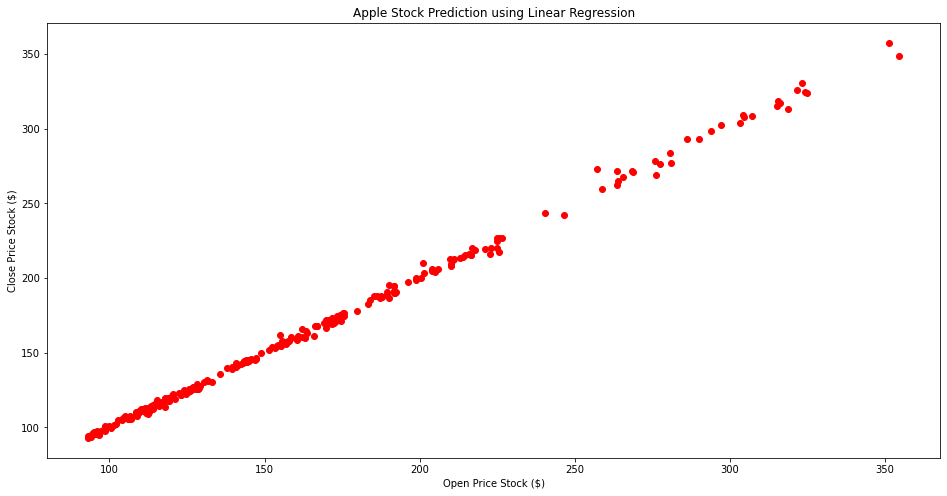

In [ ]:
# Creando el grafico que muestra el resultado de la prediccion del modelo
plt.figure(figsize=(16,8))
# Se agrega el titulo 
plt.title('Apple Stock Prediction using Linear Regression')
# Se agrega las etiquetas en los ejes
plt.xlabel('Open Price Stock ($)')
plt.ylabel('Close Price Stock ($)')
#plt.plot(df_test['open'],y_test)
# grafico de dispersion con los valores de prueba de open con respecto a los valores predecidos de close
plt.scatter(df_test['open'],y_pred, color='red')
# se muestra el grafico
plt.show()

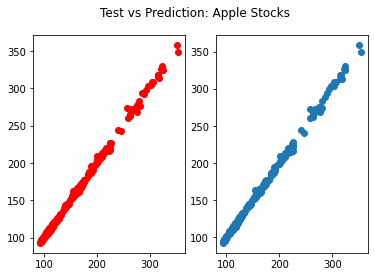

In [ ]:
# Creando un grafico de comparacion entre las predicciones y las pruebas
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Test vs Prediction: Apple Stocks')
ax1.scatter(df_test['open'],y_pred, color='red')
ax2.scatter(df_test['open'], df_test['close'])

In [ ]:
# Puntaje del modelo de Machine Learning
print("Puntaje: " + str(linear_regression.score(x_test, y_test)*100))

Puntaje: 99.9728708398387


In [ ]:
# Faltante para llegar al 100% de 'score'
print('Faltante para el 100%: ' + str((1-linear_regression.score(data_x, data_y))*100))

Faltante para el 100%: 0.02693573291876472


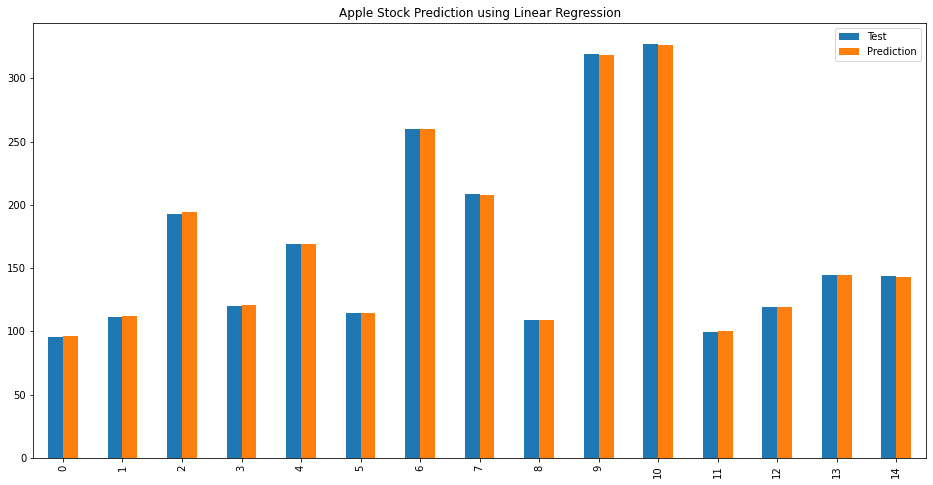

In [ ]:
# Uniendo los vectores de test y pred para formar una matriz 
array = np.concatenate((y_test, y_pred), axis = 1)
# Con pandas, transformo la matriz creada en un dataframe
data = pd.DataFrame(array, columns=['Test', 'Prediction'])
# Creo un grafico de barras con los valores del dataframe creado. Solo tomo los 15 primeros valores
data.head(15).plot(kind='bar',figsize=(16,8))
# Agregando titulo
plt.title('Apple Stock Prediction using Linear Regression')
# Ensenio el grafico
plt.show()

# Prediccion manual sin Scikit-Learn

---



# Como sacar los coeficientes de intercepcion?


```
inv(X.T.dot(X)).dot(X.T).dot(y)
```


1.   Se saca la inversa de la multiplicacion de la matriz traspuesta por la matriz original.
2.   Luego multiplicamos ese resultado por la matriz traspuesta.
3.  Por ultimo se multiplica por la variable dependiente.








In [ ]:
test = data_x.T.dot(data_x)
print(test)

[[35800326.69220001 36172687.38492065 35455800.26007038 34995691.69998594]
 [36172687.38492065 36552401.66005325 35825138.70804796 35364300.65116639]
 [35455800.26007038 35825138.70804796 35118463.8885252  34661850.5755878 ]
 [34995691.69998594 35364300.65116639 34661850.5755878  34236538.98298453]]


In [ ]:
coef = (np.linalg.inv(data_x.T.dot(data_x)).dot(data_x.T).dot(data_y)).T
print(coef)

[[-0.52807713  0.70104081  0.74203614  0.08790162]]


In [ ]:
# Se realiza la operacion antes descrita
prediccion_manual =  -0.52807713 + (167.52999878 * 0.70104081) + (164.38999939 * 0.74203614) + (162.78372192 * 0.08790162)
print('La prediccion se acerca mas cuando se realizan las operaciones a mano: ' + str(result))

La prediccion se acerca mas cuando se realizan las operaciones a mano: 166.40424117596928


In [ ]:
# Multiplicamos la matriz X con los coeficientes de intercepcion 
predic = (x_test.dot(coef.T))

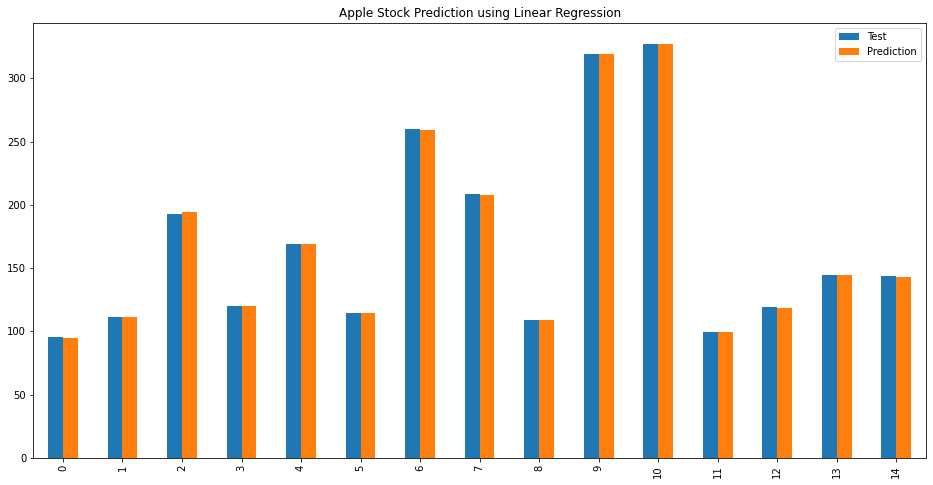

In [ ]:
# Uniendo los vectores de test y pred para formar una matriz 
array = np.concatenate((y_test, predic), axis = 1)
# Con pandas, transformo la matriz creada en un dataframe
data = pd.DataFrame(array, columns=['Test', 'Prediction'])
# Creo un grafico de barras con los valores del dataframe creado. Solo tomo los 15 primeros valores
data.head(15).plot(kind='bar',figsize=(16,8))
# Agregando titulo
plt.title('Apple Stock Prediction using Linear Regression')
# Ensenio el grafico
plt.show()